In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [48]:
# Load the dataset
data = pd.read_csv("train_exit.csv")

In [49]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [50]:
data.shape

(13994, 30)

In [51]:
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [52]:
data.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [54]:
# Check for missing values
print(data.isnull().sum())

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

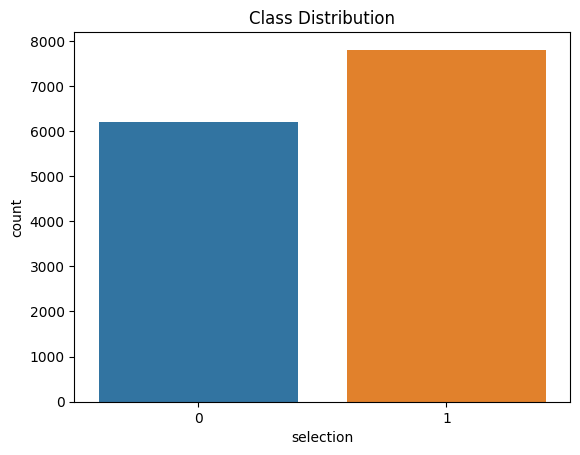

In [55]:
# Visualize class distribution
sns.countplot(x='selection', data=data)
plt.title('Class Distribution')
plt.show()

In [56]:
# Preprocessing

# Convert height to inches
data['height'] = data['height'].apply(lambda x: int(x.split("'")[0]) * 12 + int(x.split("'")[1]) if "'" in x else int(x))

# Convert weight to numeric, remove 'lbs'
data['weight'] = data['weight'].apply(lambda x: int(x.replace('lbs', '')) if isinstance(x, str) and 'lbs' in x else x)

In [57]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['strong_foot'] = label_encoder.fit_transform(data['strong_foot'])
data['behaviour_rating'] = label_encoder.fit_transform(data['behaviour_rating'])

In [58]:
from sklearn.impute import SimpleImputer

In [59]:
# Handle missing values
columns_to_drop = ['player_id', 'name', 'country']
data = data.drop(columns=columns_to_drop, errors='ignore')  # Drop non-numeric columns for simplicity
numeric_columns = data.columns

In [60]:
# Print unique values in each numeric column
for column in numeric_columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in age: [23 18 16 27 19 21 24 25 17 29 20 28 22 26 32 31 51 30 36 34 33 52 57 54
 35 50 39 49 55 53 48 59 60 37 58 61 38 56 40]
Unique values in gender: [1 0 2]
Unique values in height: [  74   70   71   68   72   73   69   66   75   67   76   78   65   77
   85   63   79   64  145   83   80   17  113   81  132  122   62 1188
 1069   99   53]
Unique values in weight: [176. 148. 172. 165. 158. 174. 168. 183. 185. 156. 202. 154. 161. 145.
 143. 152. 163. 146.  nan 192. 181. 190. 196. 141. 150. 169. 179. 160.
 157. 187. 137. 171. 134. 170. 139. 140. 159. 184. 178. 151. 162. 138.
 182. 200. 136. 189. 149. 167. 201. 198. 123. 194. 132. 127. 193. 126.
 212. 207. 180. 147. 130. 173. 205. 209. 203. 191. 195. 128. 129. 211.
 125. 216. 121. 214. 117. 206. 225. 204. 220. 110. 223. 218. 118. 119.
 227. 243. 234. 213. 215.]
Unique values in ball_controlling_skills: [77. 54. 34. 79. 47. 63. 64. 58. 67. 49. 84. 56. 42. 66. 76. 61. 70. 78.
 52. 62. 86. 57. 68. 59. 60. 16. 55. 36. 29. 81.

In [61]:
# Train-test split
X = data.drop('selection', axis=1)
y = data['selection']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
# Standardize numerical features
scaler = StandardScaler()
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_train_numeric = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=X_train_numeric.columns)


In [63]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_numeric_imputed = pd.DataFrame(imputer.fit_transform(X_train_numeric), columns=X_train_numeric.columns)


In [64]:
X_train_numeric = X_train_numeric.dropna()


In [65]:
# Apply the same imputation or dropping to both features and target
X_train_numeric_imputed = pd.DataFrame(imputer.fit_transform(X_train_numeric), columns=X_train_numeric.columns)
X_train_imputed, y_train_imputed = X_train_numeric_imputed, y_train  # Adjust as needed


In [66]:
# Check for missing values in the target variable
print(y_train.isnull().sum())


0


In [67]:
# Print the dimensions of X_train_numeric and y_train
print("X_train_numeric shape:", X_train_numeric.shape)
print("y_train shape:", y_train.shape)


X_train_numeric shape: (8986, 24)
y_train shape: (11195,)


In [68]:
from sklearn.model_selection import train_test_split

# Example train-test split
X_train_numeric, X_test_numeric, y_train, y_test = train_test_split(X_train_numeric, y_train, test_size=0.2, random_state=42)


ValueError: Found input variables with inconsistent numbers of samples: [8986, 11195]

In [ ]:
data.columns

In [ ]:
from sklearn.model_selection import train_test_split

# Combine X_train_numeric and y_train into a single DataFrame
combined_data = pd.concat([X_train_numeric, y_train], axis=1)

# Perform the train-test split on the combined data
train_data, test_data = train_test_split(combined_data, test_size=0.2, random_state=42)

# Separate features and target in the training set
X_train_numeric = train_data.drop('selection', axis=1)  # replace 'target_column_name' with the actual name of your target column
y_train = train_data['selection']

# Separate features and target in the test set
X_test_numeric = test_data.drop('selection', axis=1)
y_test = test_data['selection']


In [ ]:
print("Number of NaN values in y_train:", y_train.isna().sum())


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform on y_train
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_train = pd.Series(y_train_imputed, index=y_train.index)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
model = RandomForestClassifier()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_numeric, y_train)

# Get the best parameters
best_params = grid_search.best_params_


In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_numeric, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best parameters to train the final model
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train_numeric, y_train)

In [ ]:
# Model Evaluation

# Transform the test set
X_test_numeric = pd.DataFrame(scaler.transform(X_test.select_dtypes(include=[np.number])), columns=X_test.select_dtypes(include=[np.number]).columns)

# Predict on the test set
y_pred = final_model.predict(X_test_numeric)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))